In [6]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [4]:
df=pd.read_csv("C:/Users/user/Desktop/data set/CC GENERAL.csv")

In [5]:
mean=df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'].fillna(mean,inplace=True)

In [7]:
df.dropna(inplace=True)

In [13]:
df.drop('CUST_ID',axis=1,inplace=True)

In [35]:
lf=IsolationForest(contamination=0.1)

In [36]:
lf.fit(df)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [37]:
df['isolate']=lf.predict(df)

In [38]:
df['isolate'].value_counts()

 1    8054
-1     895
Name: isolate, dtype: int64

<AxesSubplot:title={'center':'Distribution of clusters based on Credit limit and payment'}, xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

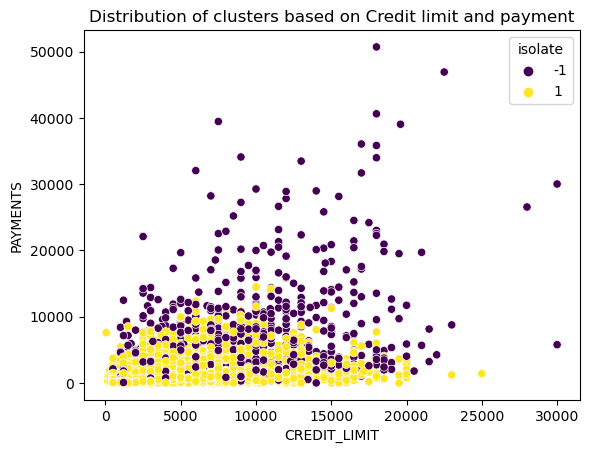

In [39]:
plt.title('Distribution of clusters based on Credit limit and payment')
sns.scatterplot(x="CREDIT_LIMIT",y="PAYMENTS",hue = 'isolate', data=df,palette='viridis')